# Data exploration and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Somes constants
PROFILING = False

## Load data

In [3]:
df = pd.read_csv("../data/wine.csv")
df.drop("index", axis=1, inplace=True)

In [4]:
df_white = pd.read_csv("../data/original/winequality-white.csv", sep=';')
df_red = pd.read_csv("../data/original/winequality-red.csv", sep=';')

## Profiling

In [5]:
if PROFILING:
    profile = ProfileReport(df, title="Pandas Profiling Report")
    profile.to_notebook_iframe()

## Primary exploration

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1372,8.7,0.78,0.51,1.70,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5
2968,7.4,0.64,0.47,14.15,0.168,42.0,185.0,0.99840,2.90,0.49,9.3,5
934,6.6,0.61,0.01,1.90,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5
1853,5.8,0.24,0.39,1.50,0.054,37.0,158.0,0.99320,3.21,0.52,9.3,6
6190,7.0,0.33,0.78,9.90,0.042,21.0,251.0,0.99435,3.01,0.55,11.0,6
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
271,11.5,0.18,0.51,4.00,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6
3700,6.8,0.28,0.35,2.30,0.042,16.0,85.0,0.99060,3.19,0.56,12.4,6
3878,7.1,0.40,0.52,1.30,0.148,45.0,149.0,0.99468,3.08,0.56,8.7,5
5368,6.9,0.40,0.17,12.90,0.033,59.0,186.0,0.99754,3.08,0.49,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64


<AxesSubplot:>

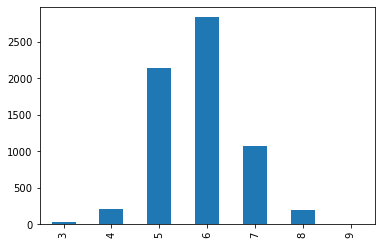

In [10]:
target = df['quality'].value_counts().sort_index()
print(target)
target.plot(kind="bar")

<AxesSubplot:>

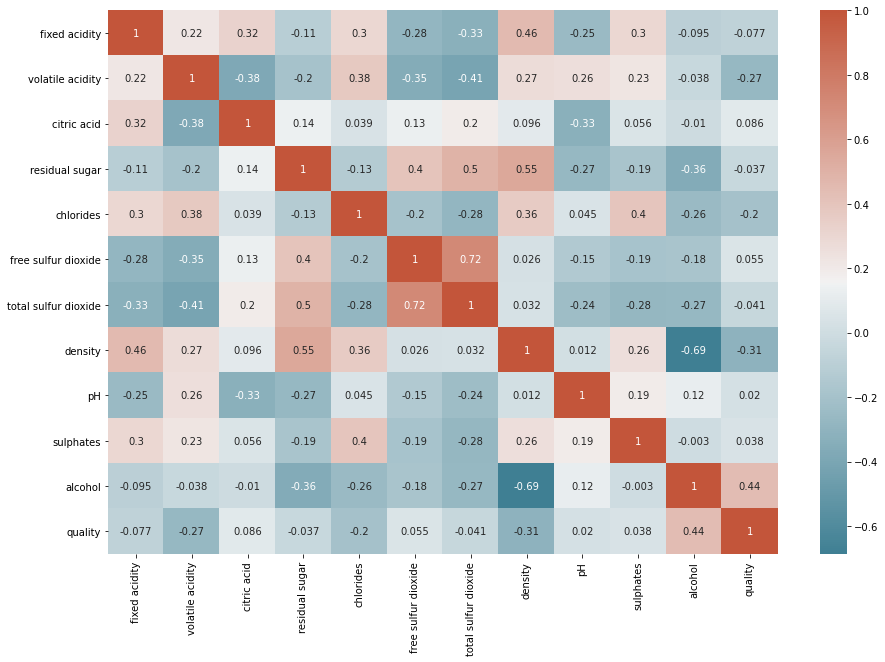

In [11]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(
    corr, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns, 
    annot=True, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True))

From the above heatmap and correlation plot on the red wine, we have the following inference:

- There is a strong positive relationship between total sulfur dioxide and free sulfur dioxide.

- There is a strong negative relationship between alcohol and density.

- It looks like we have pH and fixed acidity has inverse relationships between them. The same in case of citric acid and volatile acidity too.


<AxesSubplot:>

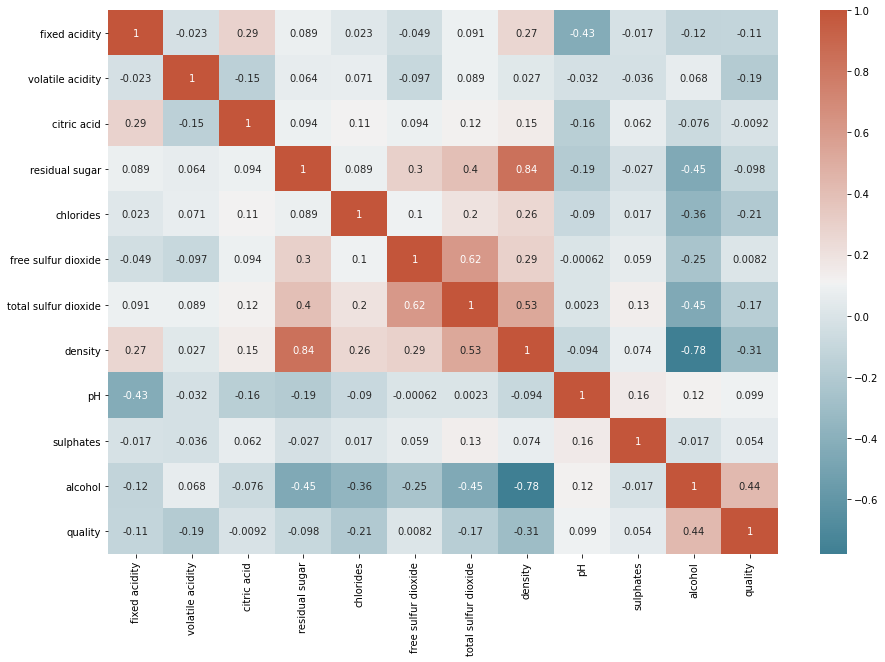

In [35]:
corr_white = df_white.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(
    corr_white, 
    xticklabels=corr_white.columns, 
    yticklabels=corr_white.columns, 
    annot=True, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:>

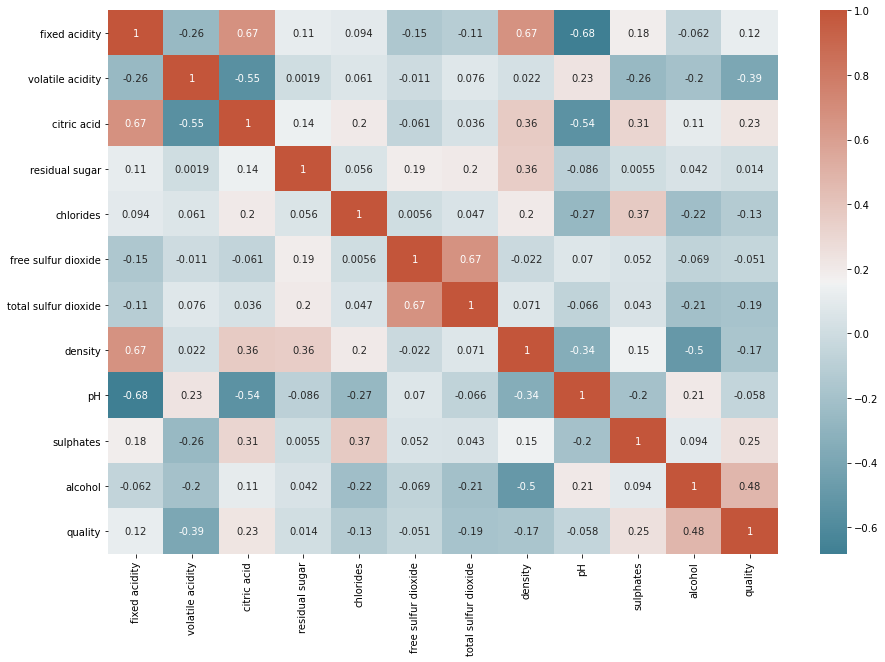

In [36]:
corr_red = df_red.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(
    corr_red, 
    xticklabels=corr_red.columns, 
    yticklabels=corr_red.columns, 
    annot=True, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True))

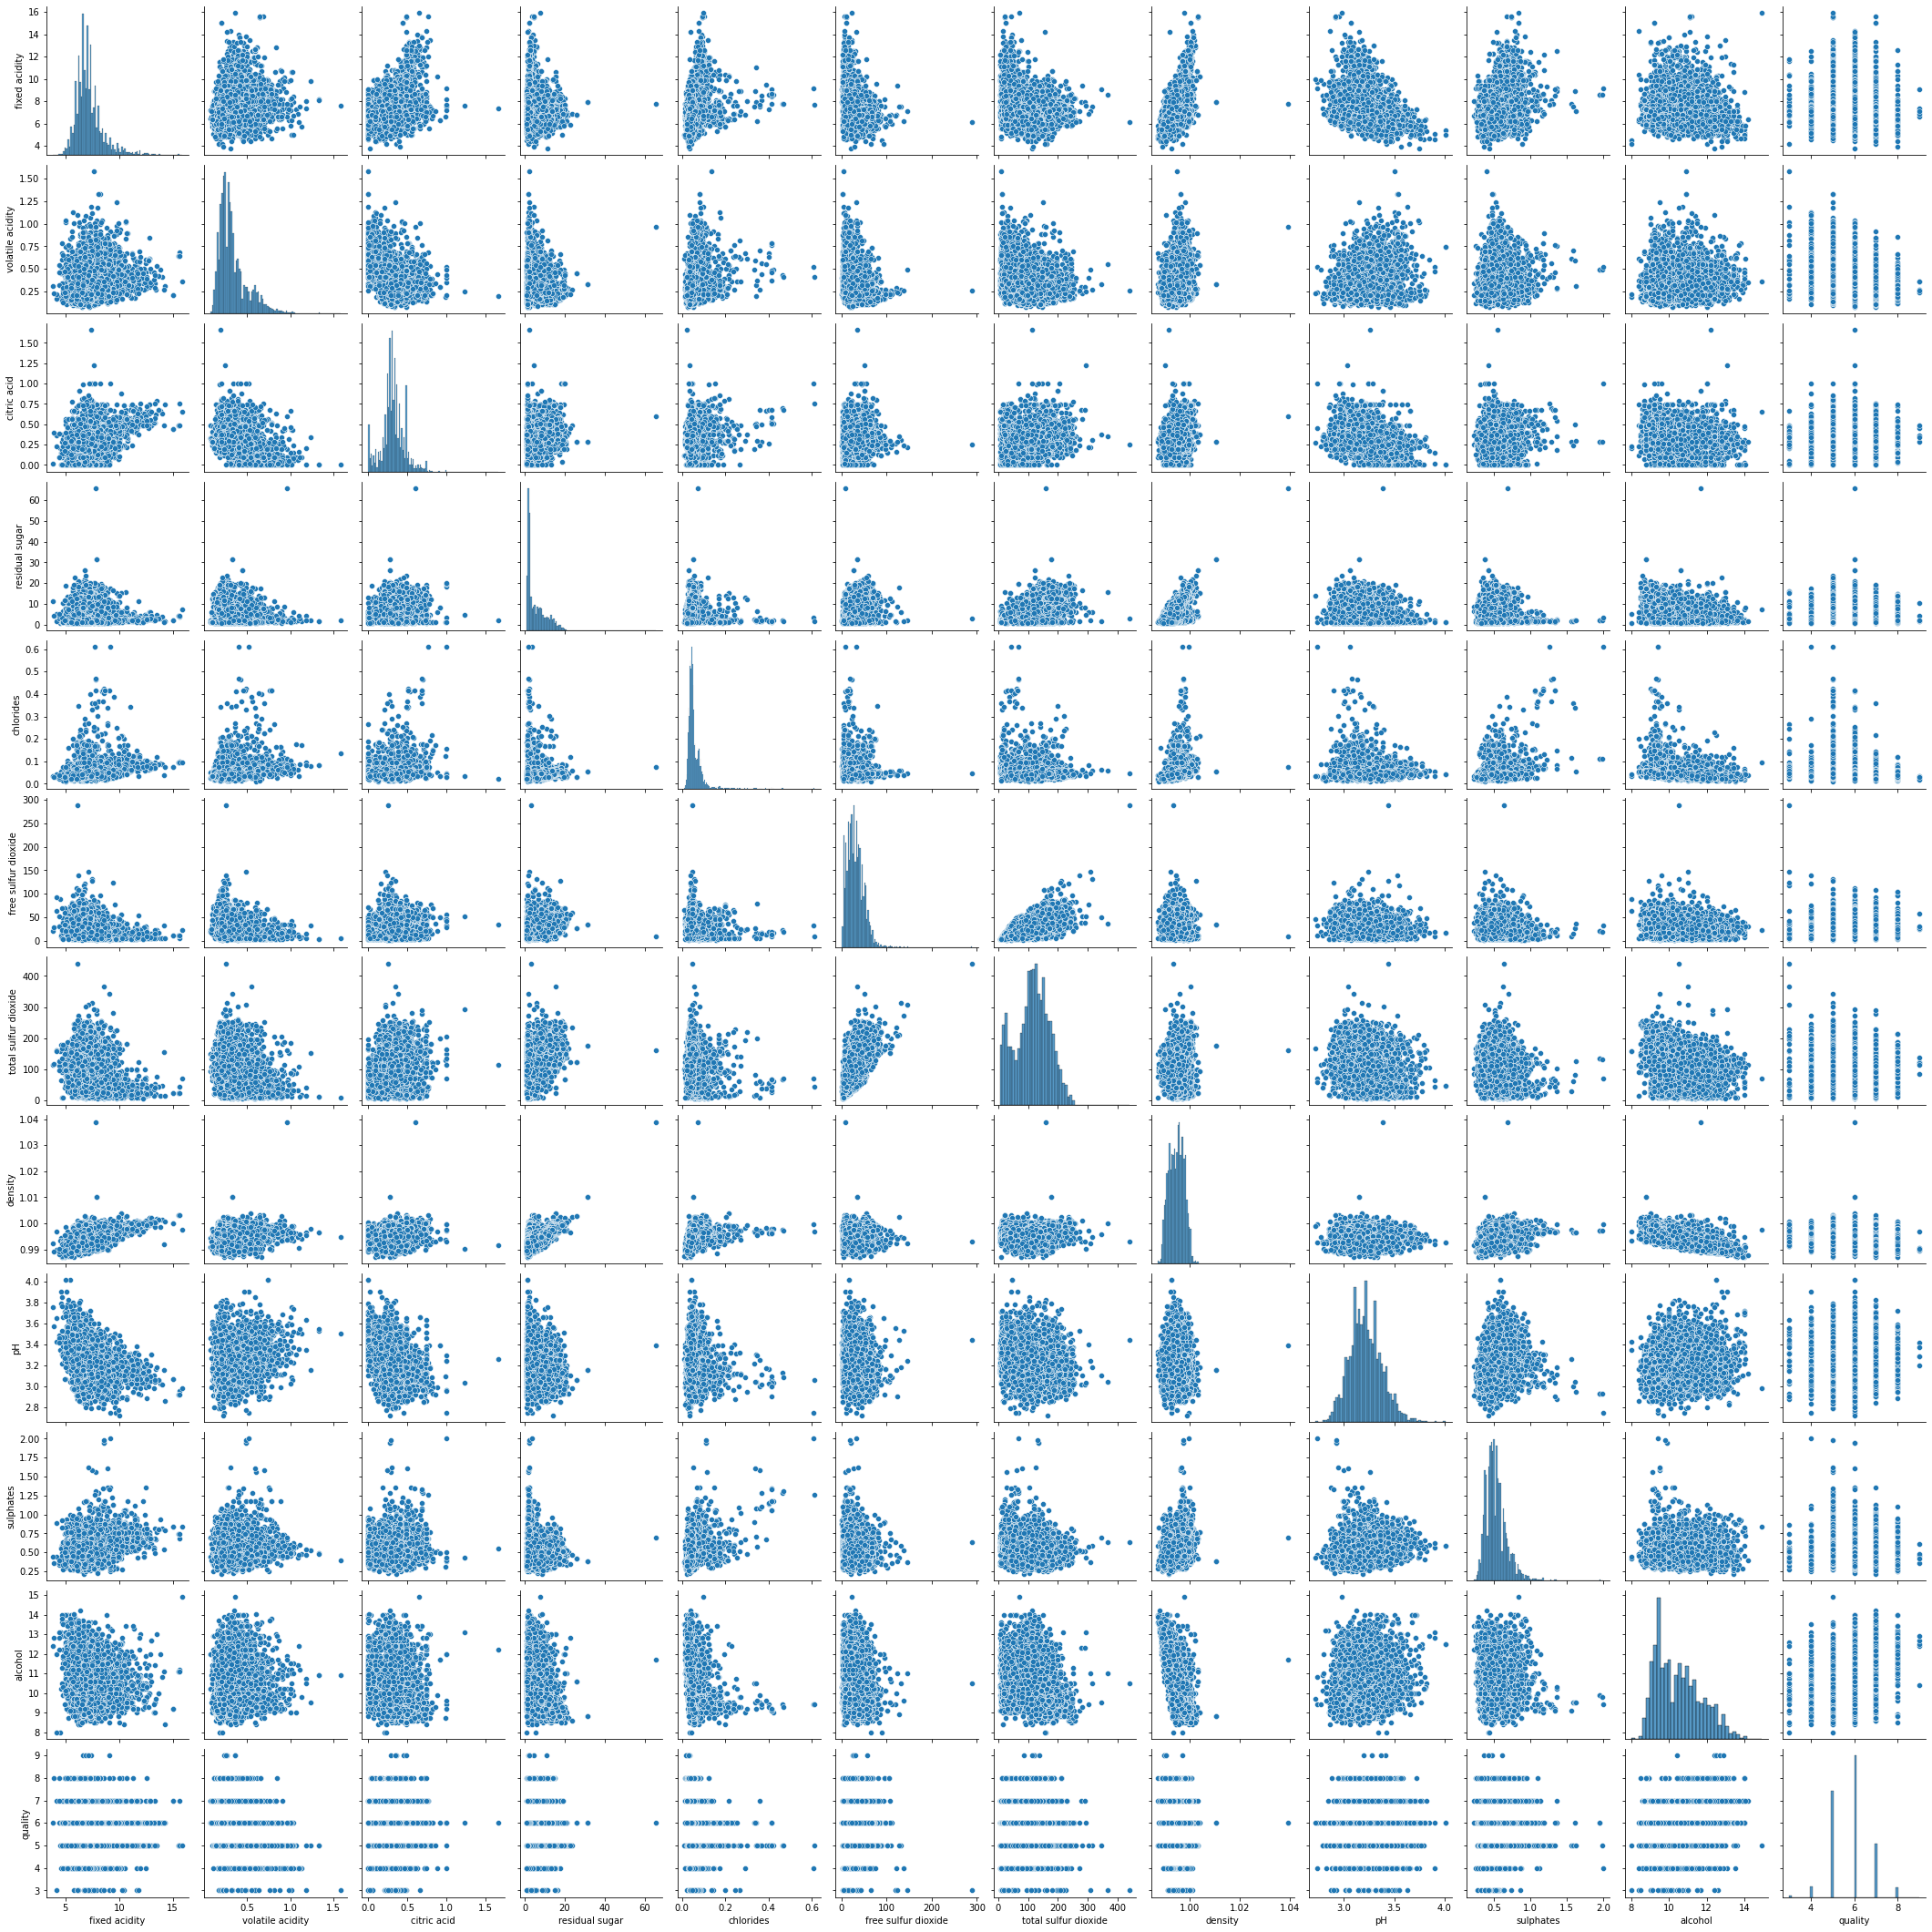

In [12]:
sns.pairplot(df)

## Checking outliers

In [13]:
# define columns features vs target
col_target = 'quality'
col_features = df.columns.to_list()
col_features.remove(col_target)
col_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

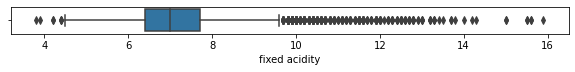

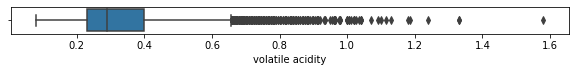

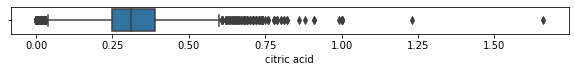

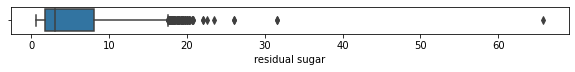

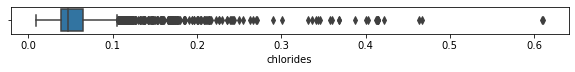

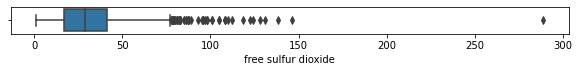

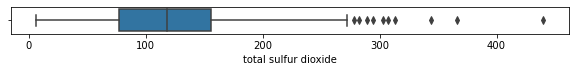

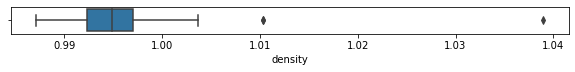

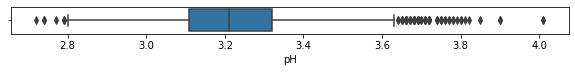

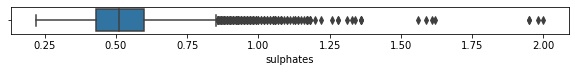

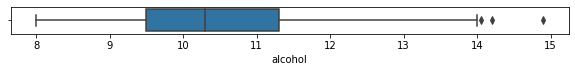

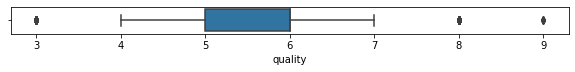

In [14]:
for c in df.columns:
    fig, ax = plt.subplots(figsize=(10, .5))
    #sns.boxplot(x="value", y="variable", data=pd.melt(df))
    sns.boxplot(x=df[c])
    plt.show()

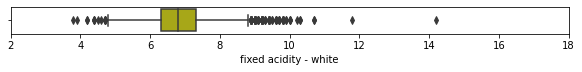

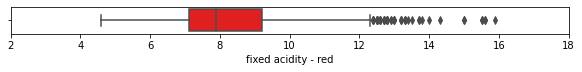

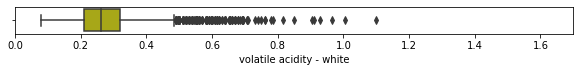

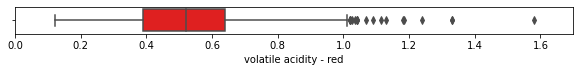

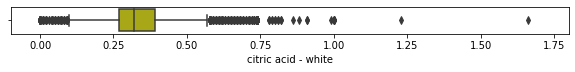

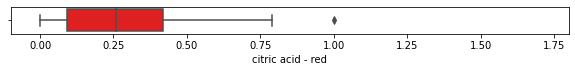

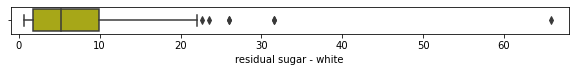

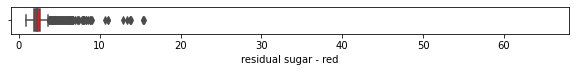

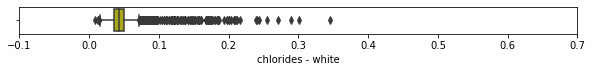

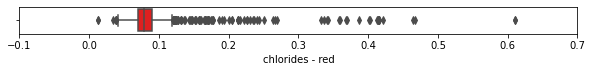

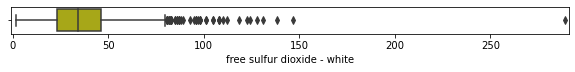

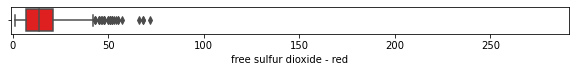

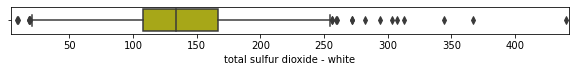

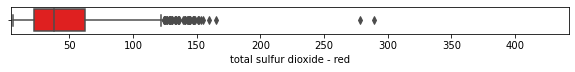

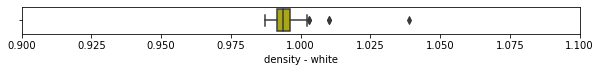

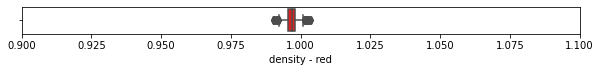

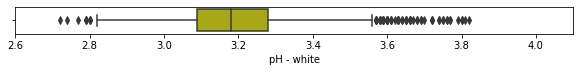

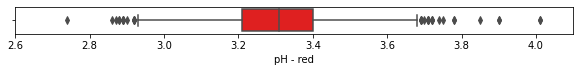

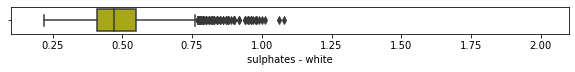

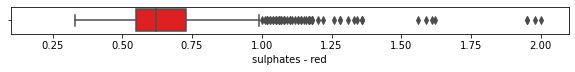

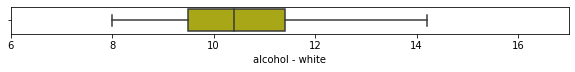

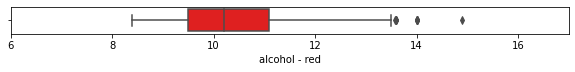

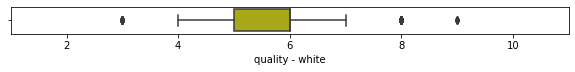

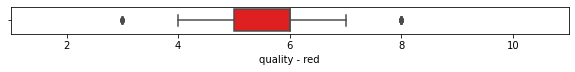

In [15]:
for c in df.columns:
    min_x = min(min(df_white[c]), min(df_red[c]))
    max_x = max(max(df_white[c]), max(df_red[c]))
    
    if max_x - min_x > 2:
        min_x = round(min_x - 2, 0)
        max_x = round(max_x + 2, 0)
    else:
        min_x = round(min_x - 0.1, 1)
        max_x = round(max_x + 0.1, 1)
    
    # White wine
    fig, ax = plt.subplots(figsize=(10, .5))
    sns.boxplot( x=df_white[c], color='y')
    ax.set_xlabel(c + " - white")
    ax.set_xlim(min_x, max_x)
    plt.show()
    
    # Red wine
    fig, ax = plt.subplots(figsize=(10, .5))
    sns.boxplot(x=df_red[c], color='r')
    ax.set_xlabel(c + " - red")
    ax.set_xlim(min_x, max_x)
    plt.show()

## Split train test

In [16]:
test_size = 0.2

# Global (Mix red / white)
X = df[col_features].astype("float32")
y = pd.get_dummies(df[col_target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# White
X_white = df_white[col_features].astype("float32")
y_white = pd.get_dummies(df_white[col_target])
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=test_size, random_state=42)

# Red
X_red = df_red[col_features].astype("float32")
y_red = pd.get_dummies(df_red[col_target])
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=test_size, random_state=42)


In [17]:
X_train.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1916,6.6,0.24,0.35,7.7,0.031,36.0,135.0,0.99380,3.19,0.37,10.5
947,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4


In [18]:
y_train.head(2)

,3,4,5,6,7,8,9
1916,0,0,1,0,0,0,0
947,0,0,0,0,1,0,0


# Training zone
## Useful functions

In [19]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import History
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MSE, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [20]:
def get_sequential_model(
    nb_features, 
    nb_hidden_neurons, 
    nb_classes, 
    nb_hidden_layers=2, 
    hidden_activation="relu", 
    final_activation="softmax"
):
    model = Sequential()
    model.add(Input(shape=(nb_features, )))
    for i in range(0,nb_hidden_layers):
        model.add(Dense(nb_hidden_neurons, activation=hidden_activation, name=f"hidden_layer_{i}"))
    model.add(Dense(nb_classes, activation=final_activation, name="predictions"))
    
    return model

In [21]:
def plot_history(history):
    if isinstance(history, History):
        history = {"": history}
        
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
    axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
    axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
    
    for k,h in history.items():
        loss = h.history['loss']
        accuracy = h.history['accuracy']
        axs[0].plot(range(len(loss)), loss, label=k)
        axs[1].plot(range(len(accuracy)), accuracy, label=k)    
    
    if len(history) > 1:
        axs[0].legend()
        axs[1].legend()
    plt.show()

In [22]:
def evaluate_model(model, X_test, y_test):
    results = model.evaluate(X_test, y_test)
    return results
    #print(f"\nAccuracy on test set is {results[1]*100:.2f}%")

## Baseline Model

In [41]:
# Setting some constants
nb_features = X_train.shape[1]
nb_classes = y_train.shape[1]
nb_hidden_neurons = 10
epochs = 100
batch_size = 5

verbose = 0

learning_rate = 0.001 
criterion = MSE
optimizer = Adam(learning_rate=learning_rate)  

In [42]:
model = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes)
model.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

In [25]:
model_white = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes)
model_white.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history_white = model_white.fit(X_train_white, y_train_white, epochs=epochs, batch_size=batch_size, verbose=verbose)

In [26]:
model_red = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes-1)  # There is a category less
model_red.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history_red = model_red.fit(X_train_red, y_train_red, epochs=epochs, batch_size=batch_size, verbose=verbose)

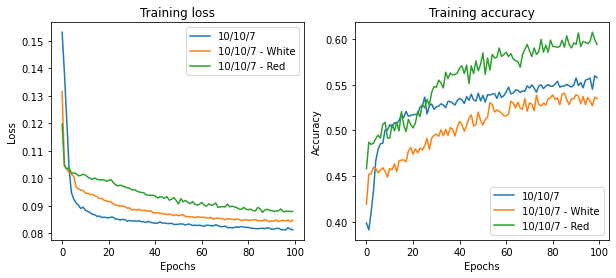

In [43]:
plot_history({"10/10/7":history, "10/10/7 - White":history_white, "10/10/7 - Red": history_red})

In [44]:
evaluate_model(model, X_test, y_test)
evaluate_model(model_white, X_test_white, y_test_white)
evaluate_model(model_red, X_test_red, y_test_red)

10/10 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.5312


[0.09573906660079956, 0.53125]

## Standardising

In [37]:
# Global (Mix red / white)
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# White
scaler_white = StandardScaler().fit(X_train_white)
X_train_white_std = scaler.transform(X_train_white)
X_test_white_std = scaler.transform(X_test_white)

# Red
scaler_red = StandardScaler().fit(X_train_red)
X_train_red_std = scaler.transform(X_train_red)
X_test_red_std = scaler.transform(X_test_red)

In [30]:
model_std = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes)
model_std.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history_std = model_std.fit(X_train_std, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

In [31]:
model_white_std = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes)
model_white_std.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history_white_std = model_white_std.fit(X_train_white_std, y_train_white, epochs=epochs, batch_size=batch_size, verbose=verbose)

In [32]:
model_red_std = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes-1)  # There is a category less
model_red_std.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history_red_std = model_red_std.fit(X_train_red_std, y_train_red, epochs=epochs, batch_size=batch_size, verbose=verbose)

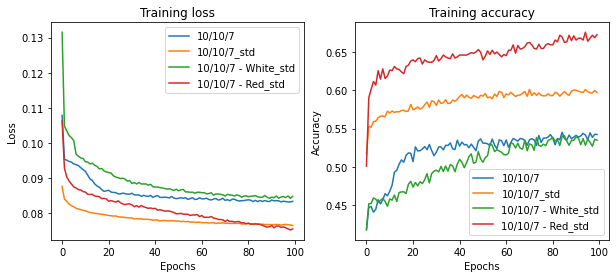

In [33]:
plot_history({"10/10/7":history,"10/10/7_std":history_std, "10/10/7 - White_std":history_white, "10/10/7 - Red_std": history_red_std})

In [40]:
evaluate_model(model, X_test_std, y_test)
evaluate_model(model_white, X_test_white_std, y_test_white)
evaluate_model(model_red, X_test_red_std, y_test_red)

10/10 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.4344


[0.16487716138362885, 0.43437498807907104]

In [58]:
# Setting some constants
nb_features = X_train.shape[1]
nb_classes = y_train.shape[1]
nb_hidden_neurons = 100
nb_hidden_layers = 6
final_activation="softmax"
epochs = 200
batch_size = 5

verbose = 0

learning_rate = 0.001 
criterion = MSE
optimizer = Adam(learning_rate=learning_rate) 

In [59]:
model_1 = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes, nb_hidden_layers, final_activation=final_activation)
model_1.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history_1 = model_1.fit(X_train_std, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

model_2 = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes, nb_hidden_layers, final_activation=final_activation)
model_2.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history_2 = model_2.fit(X_train_white_std, y_train_white, epochs=epochs, batch_size=batch_size, verbose=verbose)

model_3 = get_sequential_model(nb_features, nb_hidden_neurons, nb_classes-1, nb_hidden_layers, final_activation=final_activation)  # There is a category less
model_3.compile(optimizer=optimizer, loss=criterion, metrics= "accuracy")
history_3 = model_3.fit(X_train_red_std, y_train_red, epochs=epochs, batch_size=batch_size, verbose=verbose)

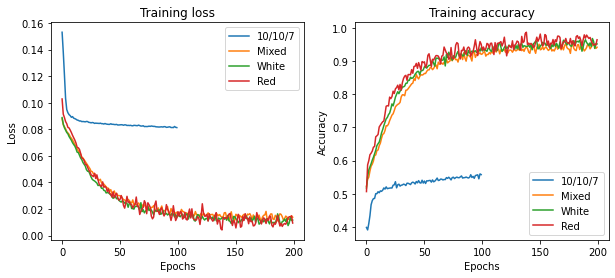

In [60]:
plot_history({"10/10/7":history,"Mixed":history_1, "White":history_2, "Red": history_3})

In [61]:
evaluate_model(model_1, X_test_std, y_test)
evaluate_model(model_2, X_test_white_std, y_test_white)
evaluate_model(model_3, X_test_red_std, y_test_red)

10/10 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.6750


[0.09755587577819824, 0.675000011920929]